In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [5]:
df.isna().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

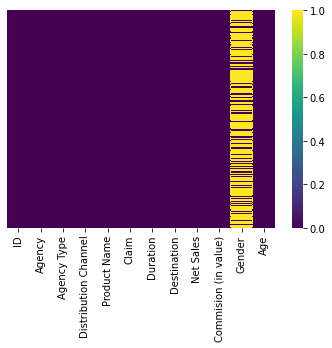

In [6]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [7]:
df.drop(["Gender","ID"],axis=1,inplace=True)

In [8]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


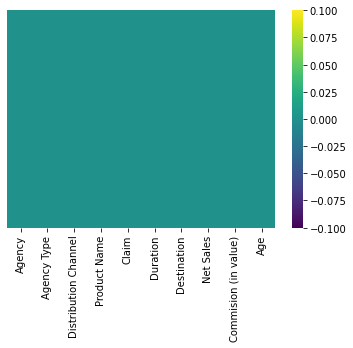

In [9]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                50553 non-null  object 
 1   Agency Type           50553 non-null  object 
 2   Distribution Channel  50553 non-null  object 
 3   Product Name          50553 non-null  object 
 4   Claim                 50553 non-null  int64  
 5   Duration              50553 non-null  int64  
 6   Destination           50553 non-null  object 
 7   Net Sales             50553 non-null  float64
 8   Commision (in value)  50553 non-null  float64
 9   Age                   50553 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [11]:
df.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,40.011236
std,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,44.000000
max,1.000000,4881.000000,810.000000,283.50000,118.000000


In [12]:
df.describe(include=["object"])

,Agency,Agency Type,Distribution Channel,Product Name,Destination
count,50553,50553,50553,50553,50553
unique,16,2,2,25,102
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,28002,36575,49665,14872,10608


In [13]:
df_cat=df.select_dtypes(["object"])
df_num=df.select_dtypes(["float64","int64"])

In [14]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


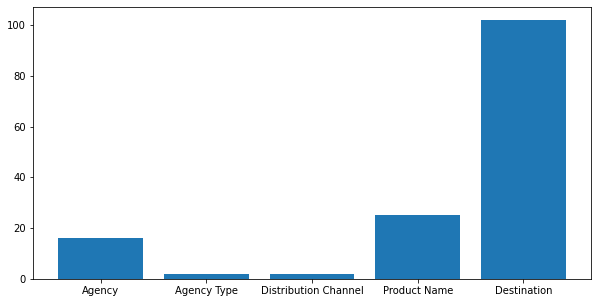

In [15]:
plt.figure(figsize=(10,5))
plt.bar(df_cat.columns,df_cat.nunique())
plt.show()

In [16]:
df["Agency"].value_counts().sort_values()

ADM       63
CSR       68
TTW       77
CBH       81
CCR      158
ART      272
KML      317
TST      421
LWC      548
RAB      571
JWT      606
SSI      839
JZI     5059
C2B     6631
CWT     6840
EPX    28002
Name: Agency, dtype: int64

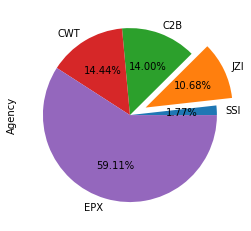

In [17]:
df["Agency"].value_counts().sort_values().tail().plot(kind="pie",autopct="%.2f%%",explode=[0,0.2,0,0,0])
plt.show()

In [18]:
df["Agency Type"].value_counts()

Travel Agency    36575
Airlines         13978
Name: Agency Type, dtype: int64

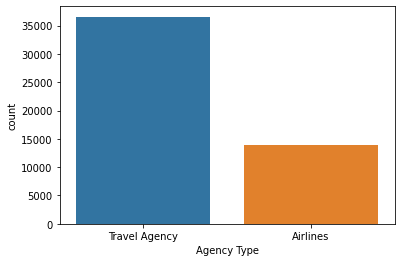

In [19]:
sns.countplot(df["Agency Type"])
plt.show()

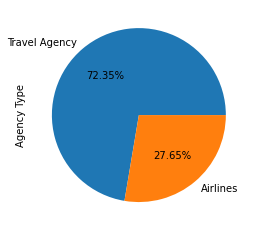

In [20]:
df["Agency Type"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [21]:
df["Distribution Channel"].value_counts()

Online     49665
Offline      888
Name: Distribution Channel, dtype: int64

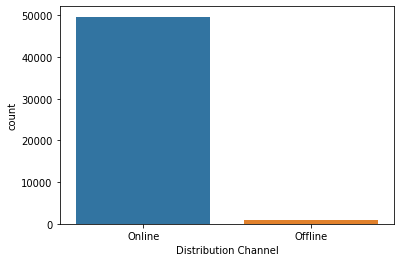

In [22]:
sns.countplot(df["Distribution Channel"])
plt.show()

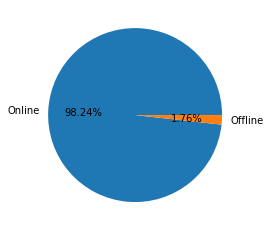

In [23]:
df["Distribution Channel"].value_counts().plot(kind="pie",autopct="%.2f%%",ylabel="")
plt.show()

In [24]:
df["Product Name"].value_counts().sort_values()

Child Comprehensive Plan                    7
Spouse or Parents Comprehensive Plan       12
Annual Travel Protect Platinum             45
Single Trip Travel Protect Platinum        57
Individual Comprehensive Plan              58
Annual Travel Protect Silver               73
Annual Travel Protect Gold                 81
Single Trip Travel Protect Silver         133
Annual Gold Plan                          148
Premier Plan                              158
Single Trip Travel Protect Gold           159
24 Protect                                199
Gold Plan                                 292
Comprehensive Plan                        293
Travel Cruise Protect                     421
Ticket Protector                          839
Annual Silver Plan                       1156
Silver Plan                              1789
Value Plan                               2169
1 way Comprehensive Plan                 2648
Bronze Plan                              3246
Basic Plan                        

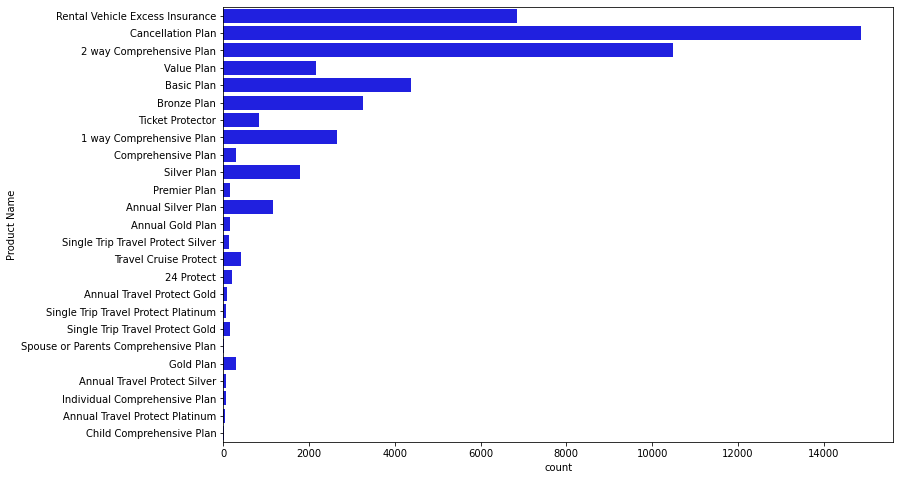

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,y="Product Name",color="blue")
plt.show()

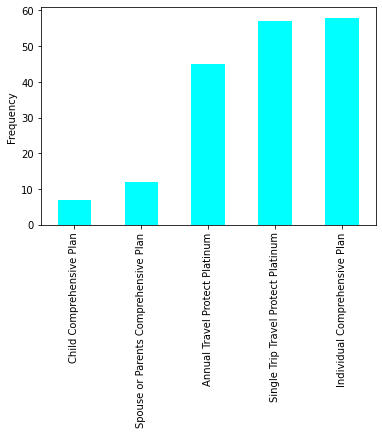

In [26]:
df["Product Name"].value_counts().sort_values().head().plot(kind="bar",ylabel="Frequency",color="cyan")
plt.show()

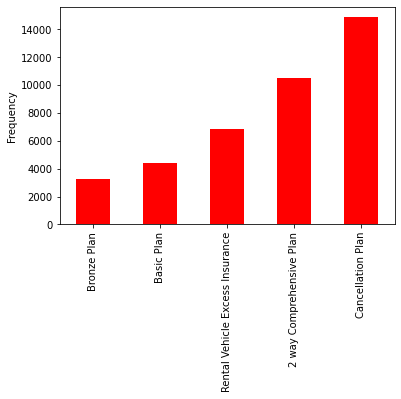

In [27]:
df["Product Name"].value_counts().sort_values().tail().plot(kind="bar",ylabel="Frequency",color="red")
plt.show()

In [28]:
df["Destination"].value_counts().sort_values()

CAYMAN ISLANDS                  1
TURKMENISTAN                    1
BHUTAN                          1
NORTHERN MARIANA ISLANDS        1
BELARUS                         2
                            ...  
AUSTRALIA                    2934
CHINA                        3836
THAILAND                     4699
MALAYSIA                     4747
SINGAPORE                   10608
Name: Destination, Length: 102, dtype: int64

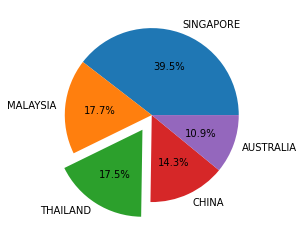

In [29]:
df["Destination"].value_counts().head().plot(kind="pie",autopct="%.1f%%",explode=[0,0,0.2,0,0],ylabel="")
plt.show()

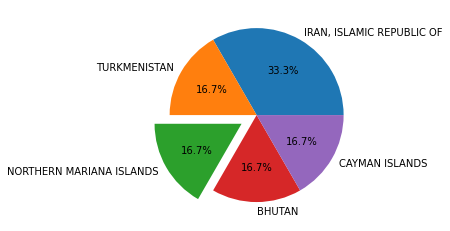

In [30]:
df["Destination"].value_counts().tail().plot(kind="pie",autopct="%.1f%%",explode=[0,0,0.2,0,0],ylabel="")
plt.show()

In [31]:
df_cat.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_cat[['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination']]=oe.fit_transform(df_cat)

In [33]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6.0,1.0,1.0,16.0,56.0
1,7.0,1.0,1.0,10.0,79.0
2,6.0,1.0,1.0,16.0,56.0
3,7.0,1.0,1.0,1.0,38.0
4,7.0,1.0,1.0,10.0,47.0


In [34]:
oe.categories_

[array(['ADM', 'ART', 'C2B', 'CBH', 'CCR', 'CSR', 'CWT', 'EPX', 'JWT',
        'JZI', 'KML', 'LWC', 'RAB', 'SSI', 'TST', 'TTW'], dtype=object),
 array(['Airlines', 'Travel Agency'], dtype=object),
 array(['Offline', 'Online'], dtype=object),
 array(['1 way Comprehensive Plan', '2 way Comprehensive Plan',
        '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan',
        'Annual Travel Protect Gold', 'Annual Travel Protect Platinum',
        'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan',
        'Cancellation Plan', 'Child Comprehensive Plan',
        'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan',
        'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan',
        'Single Trip Travel Protect Gold',
        'Single Trip Travel Protect Platinum',
        'Single Trip Travel Protect Silver',
        'Spouse or Parents Comprehensive Plan', 'Ticket Protector',
        'Travel Cruise Protect', 'Value Plan'], dtype=object),
 array(['ARGENTI

In [35]:
df_num.head()

,Claim,Duration,Net Sales,Commision (in value),Age
0,0,7,0.0,17.82,31
1,0,85,69.0,0.00,36
2,0,11,19.8,11.88,75
3,0,16,20.0,0.00,32
4,0,10,15.0,0.00,29


In [36]:
print(sorted(Counter(df["Claim"]).items()))

[(0, 49812), (1, 741)]


In [37]:
df["Claim"].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

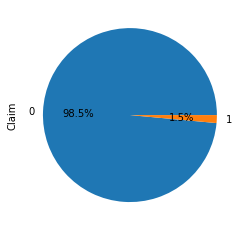

In [38]:
df["Claim"].value_counts().tail().plot(kind="pie",autopct="%.1f%%")
plt.show()

In [39]:
from scipy.stats import skew

Claim
Skewness: 8.076976414369875


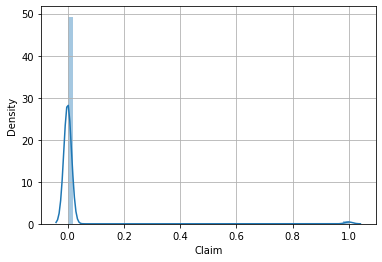

Duration
Skewness: 22.872063891229274


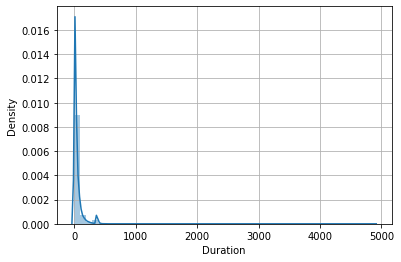

Net Sales
Skewness: 3.3281441910342053


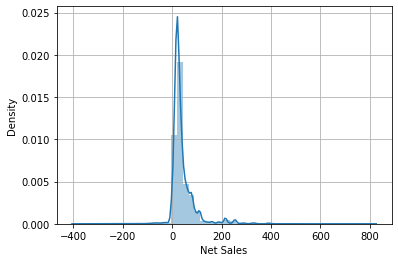

Commision (in value)
Skewness: 4.0780684356634636


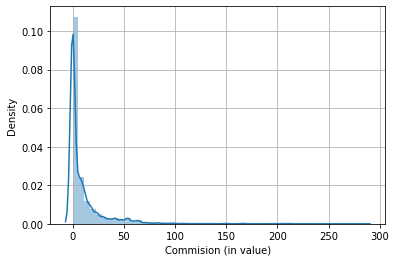

Age
Skewness: 2.9783898494112435


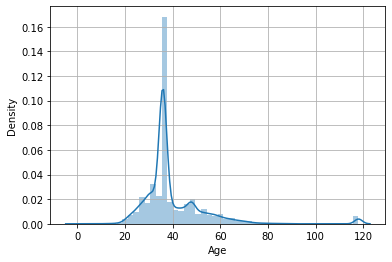

In [40]:
for col in df_num:
    print(col)
    print(f"Skewness: {skew(df_num[col])}")
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.grid(True)
    plt.show()

In [41]:
df_num.corr()["Claim"].sort_values()

Age                    -0.012106
Duration                0.076442
Commision (in value)    0.102009
Net Sales               0.138323
Claim                   1.000000
Name: Claim, dtype: float64

In [42]:
df_num.corr()

,Claim,Duration,Net Sales,Commision (in value),Age
Claim,1.000000,0.076442,0.138323,0.102009,-0.012106
Duration,0.076442,1.000000,0.437004,0.349193,0.003212
Net Sales,0.138323,0.437004,1.000000,0.657851,0.039119
Commision (in value),0.102009,0.349193,0.657851,1.000000,0.119167
Age,-0.012106,0.003212,0.039119,0.119167,1.000000


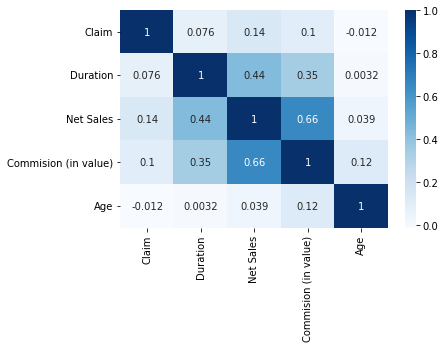

In [43]:
sns.heatmap(df_num.corr(),annot=True,cmap="Blues")
plt.show()

In [44]:
df=pd.concat([df_cat,df_num],axis=1)

In [45]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Claim,Duration,Net Sales,Commision (in value),Age
0,6.0,1.0,1.0,16.0,56.0,0,7,0.0,17.82,31
1,7.0,1.0,1.0,10.0,79.0,0,85,69.0,0.00,36
2,6.0,1.0,1.0,16.0,56.0,0,11,19.8,11.88,75
3,7.0,1.0,1.0,1.0,38.0,0,16,20.0,0.00,32
4,7.0,1.0,1.0,10.0,47.0,0,10,15.0,0.00,29


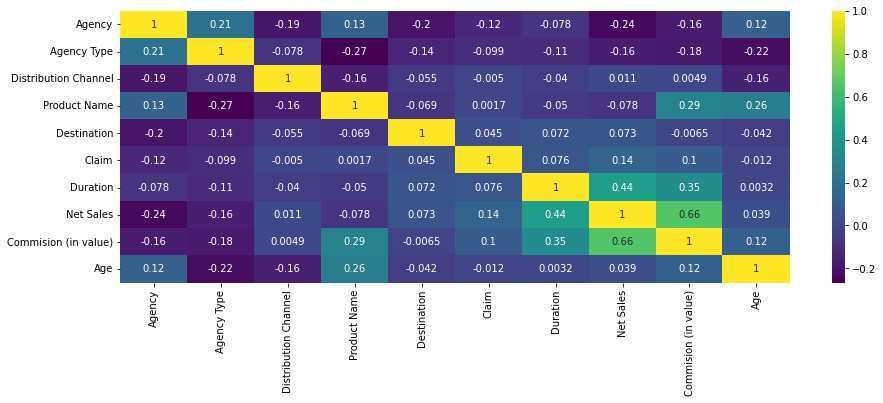

In [46]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [47]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Claim', 'Duration', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

In [48]:
x1=df.loc[ : ,['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Duration', 'Net Sales', 'Commision (in value)',
       'Age']]
x1.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Duration,Net Sales,Commision (in value),Age
0,6.0,1.0,1.0,16.0,56.0,7,0.0,17.82,31
1,7.0,1.0,1.0,10.0,79.0,85,69.0,0.00,36
2,6.0,1.0,1.0,16.0,56.0,11,19.8,11.88,75
3,7.0,1.0,1.0,1.0,38.0,16,20.0,0.00,32
4,7.0,1.0,1.0,10.0,47.0,10,15.0,0.00,29


In [49]:
y1=df.loc[ : ,["Claim"]]
y1.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [50]:
!pip install imblearn

In [51]:
from imblearn import under_sampling, over_sampling

In [52]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x,y=ros.fit_resample(x1,y1)
print(x.shape)
print(y.shape)



(99624, 9)
(99624, 1)


In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [54]:
print(f"Xtrain: {xtrain.shape}")
print(f"Xtest: {xtest.shape}")
print(f"Ytrain: {ytrain.shape}")
print(f"Ytest: {ytest.shape}")

Xtrain: (69736, 9)
Xtest: (29888, 9)
Ytrain: (69736, 1)
Ytest: (29888, 1)


In [55]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
ann=Sequential()

ann.add(Dense(units=9,activation="relu"))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

ann.fit(xtrain,ytrain,epochs=800,validation_data=(xtest,ytest),batch_size=1000)

Epoch 1/800
70/70 [==============================] - 1s 6ms/step - loss: 0.7056 - accuracy: 0.5717 - val_loss: 0.6535 - val_accuracy: 0.6248
Epoch 2/800
70/70 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.7102 - val_loss: 0.5900 - val_accuracy: 0.7423
Epoch 3/800
70/70 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.7421 - val_loss: 0.5561 - val_accuracy: 0.7459
Epoch 4/800
70/70 [==============================] - 0s 4ms/step - loss: 0.5465 - accuracy: 0.7433 - val_loss: 0.5380 - val_accuracy: 0.7454
Epoch 5/800
70/70 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7442 - val_loss: 0.5284 - val_accuracy: 0.7462
Epoch 6/800
70/70 [==============================] - 0s 6ms/step - loss: 0.5255 - accuracy: 0.7438 - val_loss: 0.5231 - val_accuracy: 0.7452
Epoch 7/800
70/70 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.7456 - val_loss: 0.5195 - val_accuracy: 0.7479
Epoch 8/800
7

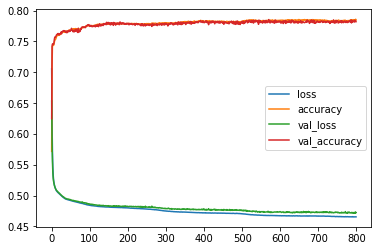

In [58]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [59]:
ann=Sequential()

ann.add(Dense(units=9,activation="relu"))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=2,patience=100)

In [62]:
ann.fit(xtrain,ytrain,epochs=800,validation_data=(xtest,ytest),batch_size=1000,callbacks=[earlystop])

Epoch 1/800
70/70 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.5652 - val_loss: 0.6550 - val_accuracy: 0.7105
Epoch 2/800
70/70 [==============================] - 0s 3ms/step - loss: 0.6367 - accuracy: 0.7338 - val_loss: 0.6146 - val_accuracy: 0.7494
Epoch 3/800
70/70 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.7477 - val_loss: 0.5566 - val_accuracy: 0.7538
Epoch 4/800
70/70 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7518 - val_loss: 0.5304 - val_accuracy: 0.7578
Epoch 5/800
70/70 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7532 - val_loss: 0.5234 - val_accuracy: 0.7566
Epoch 6/800
70/70 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7543 - val_loss: 0.5190 - val_accuracy: 0.7590
Epoch 7/800
70/70 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.7533 - val_loss: 0.5155 - val_accuracy: 0.7583
Epoch 8/800
7

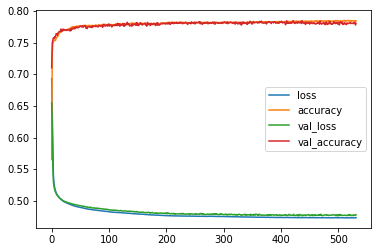

In [63]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [64]:
ypred=ann.predict(xtest)

In [65]:
ypred=ypred>0.5

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     15001
           1       0.78      0.79      0.78     14887

    accuracy                           0.78     29888
   macro avg       0.78      0.78      0.78     29888
weighted avg       0.78      0.78      0.78     29888

